In [2]:
import numpy as np
import pandas as pd
import cv2
import os
import collections
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import pyplot as plt
from matplotlib import colors
import matplotlib.image as mpimg
from tqdm import tqdm
from typing import List, Tuple, Dict, Any
import gc

### Draws the chosen score function as contour plot

In [25]:
def save_figure(
  path_output:str,
  fig_name:str, 
  figure: mpl.figure.Figure,
  dpi:int=300,
  tight_layout:bool=False) -> None:

    if not os.path.exists(path_output):
        os.makedirs(path_output, exist_ok=True)

    f_out = os.path.join(path_output, fig_name)
  
    if tight_layout:
        figure.savefig(f_out, bbox_inches='tight', pad_inches=0, dpi=dpi)
    else:
        figure.savefig(f_out, dpi=dpi)

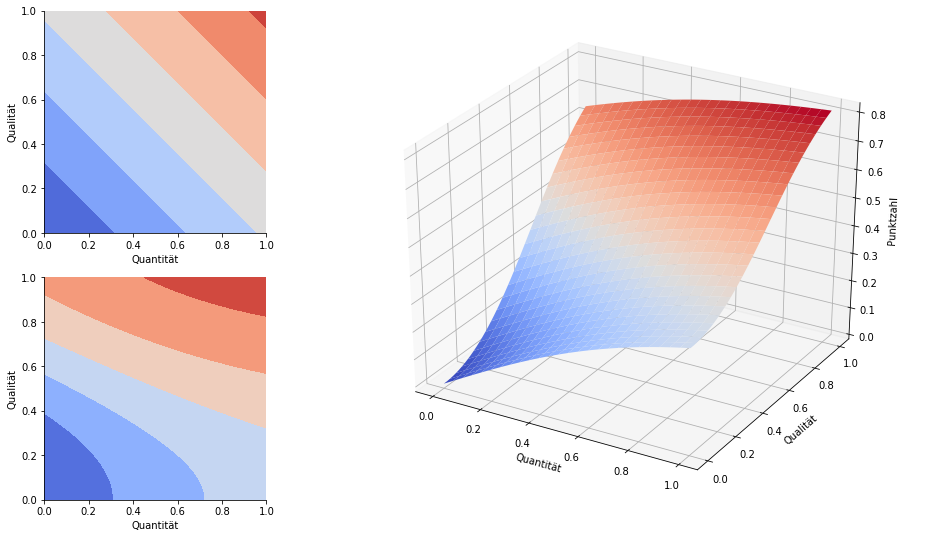

In [180]:
N = 51
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
xx, yy = np.meshgrid(x, y)
z = np.tanh(0.5 * np.tanh(xx) + np.tanh(yy**2))

cm = mpl.cm.get_cmap('coolwarm')


plt.rcParams['figure.figsize'] = [16, 9]
fig = plt.figure()

ax1 = plt.subplot2grid((2, 3), (0, 0), aspect='equal') # left top
ax2 = plt.subplot2grid((2, 3), (1, 0), aspect='equal') # left bottom
ax3 = plt.subplot2grid((2, 3), (0, 1), rowspan=2, colspan=2, projection='3d')


#ax = fig.add_subplot(131, aspect='equal')

ax = ax1
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
ax.set_xlabel('Quantität')
ax.set_ylabel('Qualität')

z_normal = 0.25 * (xx + yy)
# Contourplot
handle = ax.contourf(x,y, z_normal, cmap=cm)



#ax = fig.add_subplot(132, aspect='equal')
ax = ax2
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
ax.set_xlabel('Quantität')
ax.set_ylabel('Qualität')

# Contourplot
handle = ax.contourf(x,y, z, cmap=cm)

# 2. Plot
# ax = fig.add_subplot(133, projection='3d')
ax = ax3

ax.set_xlabel('Quantität')
ax.set_ylabel('Qualität')
ax.set_zlabel('Punktzahl')
#ax.plot_surface(xx, yy, z, cmap=cm);
ax.plot_surface(xx, yy, z, cmap=cm);

#fig.savefig('score_function.png',dpi=300)